In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U sentence-transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 98.2 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=ce9e71a6c804f18bd6886b1eedb6e51a08f4338cfec2bbaf8d50c33c4a9fd406
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets

from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score
import pickle

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
# embeddings_balanced_b_path = 'drive/MyDrive/DataBank/wordEmbedding/binary/balanced/em_3.csv'
# embeddings_balanced_b_path_im = 'drive/MyDrive/DataBank/wordEmbedding/binary/imbalanced/em_3.csv'

embeddings_balanced_b_path = 'drive/MyDrive/ThesisData/augmented_data/wordEmbedding/binary/balanced/em_3.csv'
embeddings_balanced_b_path_im = 'drive/MyDrive/ThesisData/augmented_data/wordEmbedding/binary/imbalanced/em_3.csv'



In [ ]:
plt_data_balanced = []
plt_data_imbalanced = []
plt_ROC_balanced = []
plt_ROC_imbalanced = []

In [ ]:
import sys
import numpy as np

def predictive_entropy(predictions):
    epsilon = sys.float_info.min
    predictive_entropy = -np.sum( np.mean(predictions, axis=0) * np.log(np.mean(predictions, axis=0) + epsilon),
            axis=-1)

    return predictive_entropy

#Balanced Dataset

#UNI - Directional

Adam

dataset_b.shape: 15800 1024
Iteration: 1000. Loss: 0.4145140051841736. Accuracy: 73.10127% F1: 75.01% cohen_kappa: 0.4627
Iteration: 2000. Loss: 0.6090834140777588. Accuracy: 75.50633% F1: 74.35% cohen_kappa: 0.5098
Iteration: 3000. Loss: 0.6636186838150024. Accuracy: 75.00000% F1: 71.10% cohen_kappa: 0.4989
Iteration: 4000. Loss: 0.7162163257598877. Accuracy: 76.64557% F1: 78.42% cohen_kappa: 0.5336
Iteration: 5000. Loss: 0.3304637372493744. Accuracy: 78.70253% F1: 78.86% cohen_kappa: 0.5741
Iteration: 6000. Loss: 0.5520129799842834. Accuracy: 78.54430% F1: 77.45% cohen_kappa: 0.5706
Iteration: 7000. Loss: 0.31746557354927063. Accuracy: 78.76582% F1: 77.22% cohen_kappa: 0.5749
Iteration: 8000. Loss: 0.5633883476257324. Accuracy: 80.37975% F1: 80.75% cohen_kappa: 0.6077
Uncertainity: 0.690666


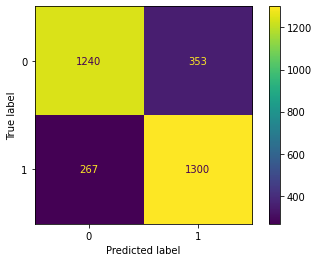

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 1024
hidden_size = 1024
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(LSTM_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional LSTM      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional
      c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
iterwise_acc = []
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)
                # print(predicted.shape)

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())


                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred,zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
                mx_acc = accuracy
                y_score_pos = pos_probs
                y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_balanced.append(('LSTM-UNI',iter,'Adam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos)
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg)

roc_auc_pos = roc_auc_score(y_true, y_score_pos)
roc_auc_neg = roc_auc_score(y_true, y_score_neg)

plt_ROC_balanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-UNI','Adam'))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

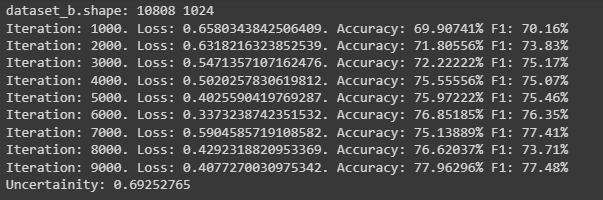

NAdam

dataset_b.shape: 15800 1024
Iteration: 1000. Loss: 0.4595308303833008. Accuracy: 72.53165% F1: 68.46% cohen_kappa: 0.4495
Iteration: 2000. Loss: 0.5104194283485413. Accuracy: 76.51899% F1: 76.47% cohen_kappa: 0.5304
Iteration: 3000. Loss: 0.36233147978782654. Accuracy: 77.37342% F1: 77.71% cohen_kappa: 0.5476
Iteration: 4000. Loss: 0.6025327444076538. Accuracy: 78.44937% F1: 79.27% cohen_kappa: 0.5693
Iteration: 5000. Loss: 0.46757301688194275. Accuracy: 77.94304% F1: 79.13% cohen_kappa: 0.5593
Iteration: 6000. Loss: 0.42294973134994507. Accuracy: 78.89241% F1: 80.21% cohen_kappa: 0.5783
Iteration: 7000. Loss: 0.4376658499240875. Accuracy: 76.36076% F1: 78.92% cohen_kappa: 0.5282
Iteration: 8000. Loss: 0.6468571424484253. Accuracy: 75.63291% F1: 78.95% cohen_kappa: 0.5140
Uncertainity: 0.64572513


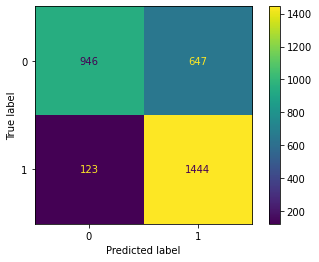

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 1024
hidden_size = 1024
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(LSTM_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional LSTM      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional
      c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())


                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred,zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)


            if mx_acc < accuracy:
                mx_acc = accuracy
                y_score_pos = pos_probs
                y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_balanced.append(('LSTM-UNI',iter,'NAdam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos)
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg)

roc_auc_pos = roc_auc_score(y_true, y_score_pos)
roc_auc_neg = roc_auc_score(y_true, y_score_neg)

plt_ROC_balanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-UNI','NAdam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

RAdam

dataset_b.shape: 15800 1024
Iteration: 1000. Loss: 0.5197679996490479. Accuracy: 73.00633% F1: 70.54% cohen_kappa: 0.4594
Iteration: 2000. Loss: 0.5043665766716003. Accuracy: 72.50000% F1: 76.24% cohen_kappa: 0.4515
Iteration: 3000. Loss: 0.972080409526825. Accuracy: 74.93671% F1: 71.95% cohen_kappa: 0.4979
Iteration: 4000. Loss: 0.5453330278396606. Accuracy: 76.61392% F1: 76.70% cohen_kappa: 0.5323
Iteration: 5000. Loss: 0.48322921991348267. Accuracy: 77.91139% F1: 77.14% cohen_kappa: 0.5580
Iteration: 6000. Loss: 0.4225730001926422. Accuracy: 78.95570% F1: 78.57% cohen_kappa: 0.5790
Iteration: 7000. Loss: 0.486293226480484. Accuracy: 79.24051% F1: 79.99% cohen_kappa: 0.5851
Iteration: 8000. Loss: 0.5325932502746582. Accuracy: 79.27215% F1: 79.13% cohen_kappa: 0.5854
Uncertainity: 0.6930245


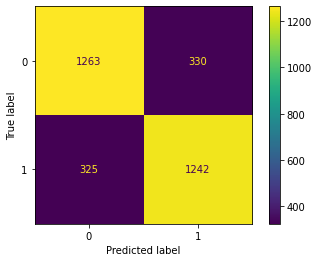

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 1024
hidden_size = 1024
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(LSTM_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional LSTM      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional
      c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred,zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)


            if mx_acc < accuracy:
                mx_acc = accuracy
                y_score_pos = pos_probs
                y_score_neg = neg_probs
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_balanced.append(('LSTM-UNI',iter,'RAdam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos)
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg)

roc_auc_pos = roc_auc_score(y_true, y_score_pos)
roc_auc_neg = roc_auc_score(y_true, y_score_neg)

plt_ROC_balanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-UNI','RAdam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

#BI - Directional

Adam

dataset_b.shape: 15800 1024
Iteration: 1000. Loss: 0.6398143768310547. Accuracy: 73.98734% F1: 71.00% cohen_kappa: 0.4789
Iteration: 2000. Loss: 0.581714391708374. Accuracy: 75.25316% F1: 73.79% cohen_kappa: 0.5046
Iteration: 3000. Loss: 0.41932135820388794. Accuracy: 77.72152% F1: 78.43% cohen_kappa: 0.5547
Iteration: 4000. Loss: 0.6397591233253479. Accuracy: 77.12025% F1: 75.20% cohen_kappa: 0.5419
Iteration: 5000. Loss: 0.5663978457450867. Accuracy: 79.27215% F1: 78.80% cohen_kappa: 0.5853
Iteration: 6000. Loss: 0.619322657585144. Accuracy: 77.72152% F1: 75.59% cohen_kappa: 0.5538
Iteration: 7000. Loss: 0.7203177213668823. Accuracy: 77.91139% F1: 79.60% cohen_kappa: 0.5589
Iteration: 8000. Loss: 0.37133705615997314. Accuracy: 77.24684% F1: 79.97% cohen_kappa: 0.5460
Uncertainity: 0.653044


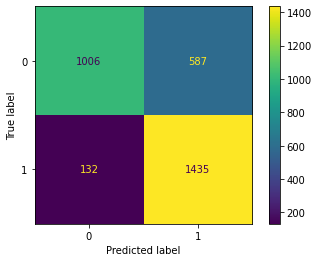

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 1024
hidden_size = 1024
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(LSTM_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For BiDirectional LSTM
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional
      c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.lstm(x,(h0,c0))#out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))


                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred,zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
                mx_acc = accuracy
                y_score_pos = pos_probs
                y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_balanced.append(('LSTM-BI',iter,'Adam',loss.item()))


pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos)
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg)

roc_auc_pos = roc_auc_score(y_true, y_score_pos)
roc_auc_neg = roc_auc_score(y_true, y_score_neg)

plt_ROC_balanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-BI','Adam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

NAdam

dataset_b.shape: 15800 1024
Iteration: 1000. Loss: 0.6423566937446594. Accuracy: 75.03165% F1: 75.60% cohen_kappa: 0.5009
Iteration: 2000. Loss: 0.4426608681678772. Accuracy: 75.75949% F1: 77.67% cohen_kappa: 0.5159
Iteration: 3000. Loss: 0.5045225024223328. Accuracy: 63.92405% F1: 72.83% cohen_kappa: 0.2824
Iteration: 4000. Loss: 0.6762383580207825. Accuracy: 76.64557% F1: 78.46% cohen_kappa: 0.5336
Iteration: 5000. Loss: 0.675521969795227. Accuracy: 79.01899% F1: 79.08% cohen_kappa: 0.5804
Iteration: 6000. Loss: 0.5161162614822388. Accuracy: 79.11392% F1: 79.70% cohen_kappa: 0.5825
Iteration: 7000. Loss: 0.46877533197402954. Accuracy: 78.63924% F1: 80.06% cohen_kappa: 0.5733
Iteration: 8000. Loss: 0.518020510673523. Accuracy: 79.43038% F1: 78.55% cohen_kappa: 0.5884
Uncertainity: 0.69106543


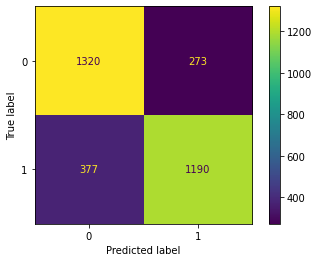

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 1024
hidden_size = 1024
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(LSTM_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For BiDirectional LSTM
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional
      c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []

            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred,zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
                mx_acc = accuracy
                y_score_pos = pos_probs
                y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_balanced.append(('LSTM-BI',iter,'NAdam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos)
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg)

roc_auc_pos = roc_auc_score(y_true, y_score_pos)
roc_auc_neg = roc_auc_score(y_true, y_score_neg)

plt_ROC_balanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-BI','NAdam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

RAdam

dataset_b.shape: 15800 1024
Iteration: 1000. Loss: 0.513572633266449. Accuracy: 74.11392% F1: 75.06% cohen_kappa: 0.4826
Iteration: 2000. Loss: 0.43684515357017517. Accuracy: 74.58861% F1: 71.70% cohen_kappa: 0.4910
Iteration: 3000. Loss: 0.44677796959877014. Accuracy: 75.53797% F1: 78.07% cohen_kappa: 0.5117
Iteration: 4000. Loss: 0.41752299666404724. Accuracy: 76.74051% F1: 78.87% cohen_kappa: 0.5356
Iteration: 5000. Loss: 0.4542059302330017. Accuracy: 74.24051% F1: 77.82% cohen_kappa: 0.4862
Iteration: 6000. Loss: 0.465411514043808. Accuracy: 76.29747% F1: 79.12% cohen_kappa: 0.5270
Iteration: 7000. Loss: 0.6362616419792175. Accuracy: 78.41772% F1: 76.22% cohen_kappa: 0.5677
Iteration: 8000. Loss: 0.42339569330215454. Accuracy: 79.08228% F1: 80.87% cohen_kappa: 0.5823
Uncertainity: 0.6718968


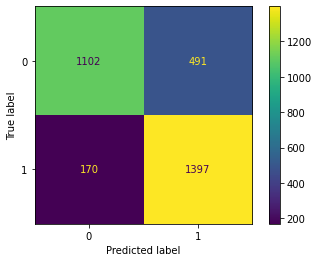

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 1024
hidden_size = 1024
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(LSTM_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For BiDirectional LSTM
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional
      c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred,zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
                mx_acc = accuracy
                y_score_pos = pos_probs
                y_score_neg = neg_probs


            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_balanced.append(('LSTM-BI',iter,'RAdam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos)
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg)

roc_auc_pos = roc_auc_score(y_true, y_score_pos)
roc_auc_neg = roc_auc_score(y_true, y_score_neg)

plt_ROC_balanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-BI','RAdam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

#Imbalance Dataset

#UNI - Directional

Adam

dataset_b.shape: 15988 1024
Iteration: 1000. Loss: 0.5913471579551697. Accuracy: 74.35737% F1: 76.12% cohen_kappa: 0.4898
Iteration: 2000. Loss: 0.5996783971786499. Accuracy: 77.11599% F1: 77.85% cohen_kappa: 0.5436
Iteration: 3000. Loss: 0.4152906835079193. Accuracy: 75.39185% F1: 71.95% cohen_kappa: 0.5047
Iteration: 4000. Loss: 0.5369159579277039. Accuracy: 78.71473% F1: 79.24% cohen_kappa: 0.5753
Iteration: 5000. Loss: 0.7257291674613953. Accuracy: 78.05643% F1: 79.07% cohen_kappa: 0.5628
Iteration: 6000. Loss: 0.6724821329116821. Accuracy: 79.71787% F1: 79.58% cohen_kappa: 0.5946
Iteration: 7000. Loss: 0.38054004311561584. Accuracy: 80.03135% F1: 78.53% cohen_kappa: 0.5993
Iteration: 8000. Loss: 0.4226170480251312. Accuracy: 80.15674% F1: 79.31% cohen_kappa: 0.6025
Uncertainity: 0.6915536


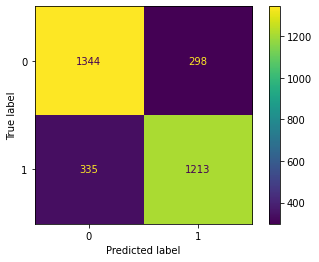

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 1024
hidden_size = 1024
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(LSTM_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional LSTM      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional
      c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
iterwise_acc = []
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)
                # print(predicted.shape)


                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred,zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
                mx_acc = accuracy
                y_score_pos = pos_probs
                y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_imbalanced.append(('LSTM-UNI',iter,'Adam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos)
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg)

roc_auc_pos = roc_auc_score(y_true, y_score_pos)
roc_auc_neg = roc_auc_score(y_true, y_score_neg)

plt_ROC_imbalanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-UNI','Adam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

NAdam

dataset_b.shape: 15988 1024
Iteration: 1000. Loss: 0.7108675241470337. Accuracy: 76.30094% F1: 75.74% cohen_kappa: 0.5258
Iteration: 2000. Loss: 0.5783630013465881. Accuracy: 76.33229% F1: 77.31% cohen_kappa: 0.5282
Iteration: 3000. Loss: 0.5047688484191895. Accuracy: 77.21003% F1: 74.77% cohen_kappa: 0.5420
Iteration: 4000. Loss: 0.564583420753479. Accuracy: 78.93417% F1: 77.63% cohen_kappa: 0.5776
Iteration: 5000. Loss: 0.4115195870399475. Accuracy: 76.58307% F1: 72.05% cohen_kappa: 0.5276
Iteration: 6000. Loss: 0.5552160143852234. Accuracy: 80.50157% F1: 79.90% cohen_kappa: 0.6097
Iteration: 7000. Loss: 0.43911561369895935. Accuracy: 79.90596% F1: 80.66% cohen_kappa: 0.5994
Iteration: 8000. Loss: 0.5992212295532227. Accuracy: 80.18809% F1: 80.37% cohen_kappa: 0.6043
Uncertainity: 0.69236606


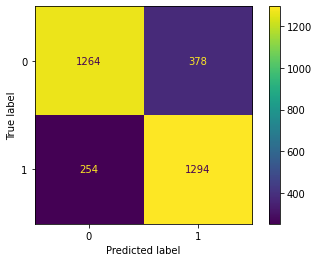

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 1024
hidden_size = 1024
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(LSTM_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional LSTM      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional
      c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred,zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)


            if mx_acc < accuracy:
                mx_acc = accuracy
                y_score_pos = pos_probs
                y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_imbalanced.append(('LSTM-UNI',iter,'NAdam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos)
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg)

roc_auc_pos = roc_auc_score(y_true, y_score_pos)
roc_auc_neg = roc_auc_score(y_true, y_score_neg)

plt_ROC_imbalanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-UNI','NAdam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

RAdam

dataset_b.shape: 15988 1024
Iteration: 1000. Loss: 0.6374166011810303. Accuracy: 74.35737% F1: 75.12% cohen_kappa: 0.4885
Iteration: 2000. Loss: 0.49236685037612915. Accuracy: 76.26959% F1: 74.96% cohen_kappa: 0.5243
Iteration: 3000. Loss: 0.5670719742774963. Accuracy: 74.48276% F1: 69.94% cohen_kappa: 0.4855
Iteration: 4000. Loss: 0.7542319893836975. Accuracy: 72.16301% F1: 76.38% cohen_kappa: 0.4495
Iteration: 5000. Loss: 0.5627986192703247. Accuracy: 79.02821% F1: 78.93% cohen_kappa: 0.5808
Iteration: 6000. Loss: 0.4133731424808502. Accuracy: 74.01254% F1: 77.67% cohen_kappa: 0.4857
Iteration: 7000. Loss: 0.48215198516845703. Accuracy: 78.96552% F1: 80.02% cohen_kappa: 0.5810
Iteration: 8000. Loss: 0.33849024772644043. Accuracy: 79.87461% F1: 79.63% cohen_kappa: 0.5976
Uncertainity: 0.69274503


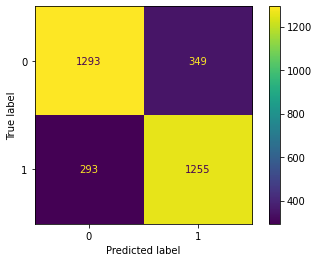

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 1024
hidden_size = 1024
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(LSTM_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional LSTM      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional
      c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred,zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
                mx_acc = accuracy
                y_score_pos = pos_probs
                y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_imbalanced.append(('LSTM-UNI',iter,'RAdam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos)
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg)

roc_auc_pos = roc_auc_score(y_true, y_score_pos)
roc_auc_neg = roc_auc_score(y_true, y_score_neg)

plt_ROC_imbalanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-UNI','RAdam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

#BI - Directional

Adam

dataset_b.shape: 15988 1024
Iteration: 1000. Loss: 0.6079801917076111. Accuracy: 74.63950% F1: 75.25% cohen_kappa: 0.4940
Iteration: 2000. Loss: 0.4641135334968567. Accuracy: 76.55172% F1: 74.71% cohen_kappa: 0.5294
Iteration: 3000. Loss: 0.3985694944858551. Accuracy: 78.43260% F1: 77.55% cohen_kappa: 0.5680
Iteration: 4000. Loss: 0.5046361684799194. Accuracy: 79.56113% F1: 79.30% cohen_kappa: 0.5913
Iteration: 5000. Loss: 0.4246741235256195. Accuracy: 77.36677% F1: 74.42% cohen_kappa: 0.5446
Iteration: 6000. Loss: 0.7208441495895386. Accuracy: 79.21630% F1: 79.61% cohen_kappa: 0.5852
Iteration: 7000. Loss: 0.413539320230484. Accuracy: 77.46082% F1: 73.54% cohen_kappa: 0.5456
Iteration: 8000. Loss: 0.6777612566947937. Accuracy: 79.18495% F1: 80.42% cohen_kappa: 0.5856
Uncertainity: 0.68023944


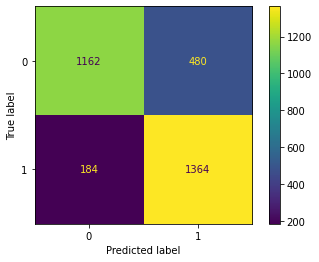

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 1024
hidden_size = 1024
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(LSTM_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For BiDirectional LSTM
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional
      c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())




                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred, zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
                mx_acc = accuracy
                y_score_pos = pos_probs
                y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_imbalanced.append(('LSTM-BI',iter,'Adam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos )
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg )

roc_auc_pos = roc_auc_score(y_true, y_score_pos )
roc_auc_neg = roc_auc_score(y_true, y_score_neg )

plt_ROC_imbalanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-BI','Adam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

NAdam

dataset_b.shape: 15988 1024
Iteration: 1000. Loss: 0.6070111989974976. Accuracy: 75.92476% F1: 78.08% cohen_kappa: 0.5521
Iteration: 2000. Loss: 0.5024221539497375. Accuracy: 72.75862% F1: 74.79% cohen_kappa: 0.5182
Iteration: 3000. Loss: 0.5260566473007202. Accuracy: 78.36991% F1: 75.37% cohen_kappa: 0.5303
Iteration: 4000. Loss: 0.463247150182724. Accuracy: 79.43574% F1: 75.89% cohen_kappa: 0.5417
Iteration: 5000. Loss: 0.5728739500045776. Accuracy: 79.52978% F1: 76.34% cohen_kappa: 0.5497
Iteration: 6000. Loss: 0.48167791962623596. Accuracy: 79.96865% F1: 76.92% cohen_kappa: 0.5569
Iteration: 7000. Loss: 0.32195448875427246. Accuracy: 79.09091% F1: 77.34% cohen_kappa: 0.5603
Iteration: 8000. Loss: 0.4732239842414856. Accuracy: 79.27900% F1: 77.51% cohen_kappa: 0.5630
Uncertainity: 0.69309425


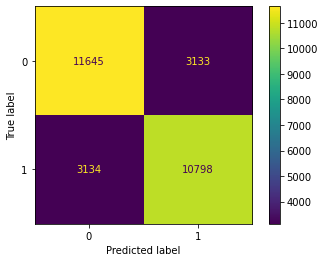

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 1024
hidden_size = 1024
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(LSTM_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For BiDirectional LSTM
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional
      c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []


for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))


                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred, zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
                mx_acc = accuracy
                y_score_pos = pos_probs
                y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_imbalanced.append(('LSTM-BI',iter,'NAdam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos )
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg )

roc_auc_pos = roc_auc_score(y_true, y_score_pos )
roc_auc_neg = roc_auc_score(y_true, y_score_neg )

plt_ROC_imbalanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-BI','NAdam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

RAdam

dataset_b.shape: 15988 1024
Iteration: 1000. Loss: 0.6000258326530457. Accuracy: 74.48276% F1: 74.03% cohen_kappa: 0.4896
Iteration: 2000. Loss: 0.487783282995224. Accuracy: 74.57680% F1: 76.59% cohen_kappa: 0.4945
Iteration: 3000. Loss: 0.574047863483429. Accuracy: 73.51097% F1: 76.78% cohen_kappa: 0.4750
Iteration: 4000. Loss: 0.4206739366054535. Accuracy: 75.83072% F1: 71.77% cohen_kappa: 0.5129
Iteration: 5000. Loss: 0.549024224281311. Accuracy: 78.74608% F1: 77.67% cohen_kappa: 0.5741
Iteration: 6000. Loss: 0.3910876214504242. Accuracy: 79.74922% F1: 79.41% cohen_kappa: 0.5949
Iteration: 7000. Loss: 0.5148056149482727. Accuracy: 79.24765% F1: 77.96% cohen_kappa: 0.5839
Iteration: 8000. Loss: 0.5115219950675964. Accuracy: 79.34169% F1: 78.57% cohen_kappa: 0.5863
Uncertainity: 0.6927911


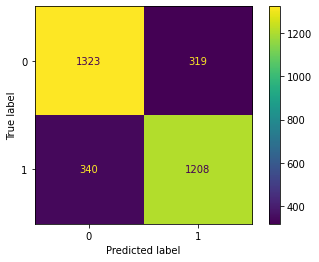

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 1024
hidden_size = 1024
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(LSTM_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For BiDirectional LSTM
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional
      c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred, zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
                mx_acc = accuracy
                y_score_pos = pos_probs
                y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_imbalanced.append(('LSTM-BI',iter,'RAdam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos )
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg )

roc_auc_pos = roc_auc_score(y_true, y_score_pos )
roc_auc_neg = roc_auc_score(y_true, y_score_neg )

plt_ROC_imbalanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-BI','RAdam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

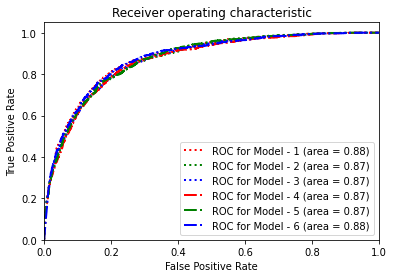

In [ ]:
# plot ROC for blanaced dataset
plt.figure()
lw = 2

colors = ['red','green','blue']

for i in range(3):
  plt.plot(
      plt_ROC_balanced[i][0],
      plt_ROC_balanced[i][1],
      color=colors[i],
      lw=lw,
      linestyle="dotted",
      label="ROC for Model - %d (area = %0.2f)" % (i+1, 1 - plt_ROC_balanced[i][2]))

for i in range(3,6):
  plt.plot(
      plt_ROC_balanced[i][0],
      plt_ROC_balanced[i][1],
      color=colors[i-3],
      lw=lw,
      linestyle="dashdot",
      label="ROC for Model - %d (area = %0.2f)" % (i+1, 1 - plt_ROC_balanced[i][2]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="best")
plt.show()

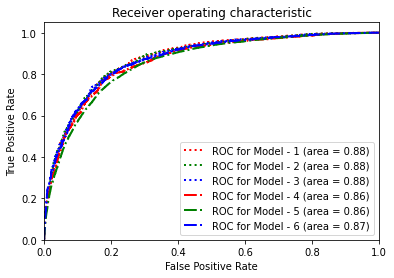

In [ ]:
# plot ROC for imblanaced dataset

plt.figure()
lw = 2
colors = ['red','green','blue']

for i in range(3):
  plt.plot(
      plt_ROC_imbalanced[i][0],
      plt_ROC_imbalanced[i][1],
      color=colors[i],
      lw=lw,
      linestyle="dotted",
      label="ROC for Model - %d (area = %0.2f)" % (i+1,1 - plt_ROC_imbalanced[i][2]))

for i in range(3,6):
  plt.plot(
      plt_ROC_imbalanced[i][0],
      plt_ROC_imbalanced[i][1],
      color=colors[i-3],
      lw=lw,
      linestyle="dashdot",
      label="ROC for Model - %d (area = %0.2f)" % (i+1,1 - plt_ROC_imbalanced[i][2]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="best")
plt.show()

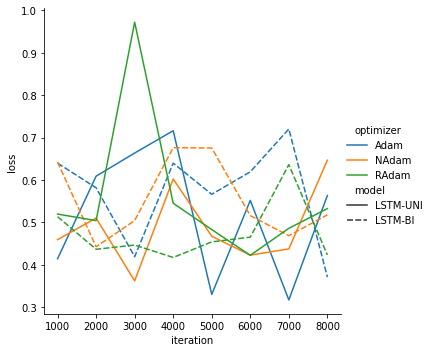

In [ ]:
plt_df = pd.DataFrame.from_records(
    plt_data_balanced, columns=['model','iteration','optimizer','loss'])
sns.relplot(x="iteration", y="loss",
            hue="optimizer", style="model",
            kind="line", data=plt_df)

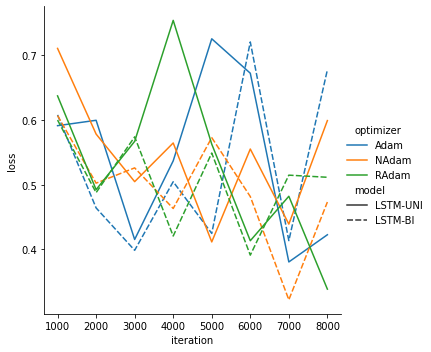

In [ ]:
plt_df = pd.DataFrame.from_records(
    plt_data_imbalanced, columns=['model','iteration','optimizer','loss'])
sns.relplot(x="iteration", y="loss",
            hue="optimizer", style="model",
            kind="line", data=plt_df)

In [ ]:
import datetime
ct = datetime.datetime.now()
print("current time:-", ct)

current time:- 2023-03-06 06:18:19.398327
